#Problem Statement
#####How will you impute data from a finite multiple set of samples such that the resultant distribution of the population has minimum bias or is unbiased. 

##Analysis
###-Entropy maximization
####What is Entropy? 
Entropy tells us how impure our data is, basically how hetrogenous our data is.<br/>
####How does the entropy look like when compared between uniform,normal and non-uniform/biased distribution?
For a biased distribution since the data is clustered on either side of the median , basically indicates that the data is non-hetrogenous in nature and requiring minimum number of bits to encode it.<br/>
For a data belonging to a uniform distribution , the data is spread evenly throughout thus requiring more number of bits to encode each unique data.<br/>
On comparing the entropy values of both it could be found that the entropy for the uniform distribution is higher than biased or the normal one. 

In [1]:
import numpy as np
import math
import random
import sys
import scipy.stats
import matplotlib.pyplot as plt

In [ ]:

def getEntropy(distribution):
    pk=dict()
    for ele in list(set(distribution)):
        pk[ele]=distribution.count(ele)/len(distribution)
    return scipy.stats.entropy(list(pk.values()))

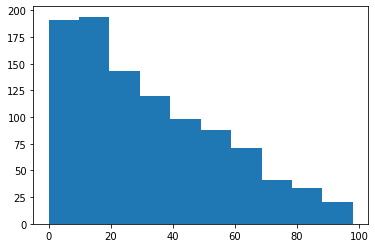

Entropy for biased distribution  4.366146802185722


In [ ]:
#Picking data from triangle distribution.
def triangle(upper_bound):
    return int(random.triangular(0.0, float(upper_bound + 1) - sys.float_info.epsilon, 0.0))
biasedDistribution=[triangle(100) for _ in range(1000)]
plt.hist(biasedDistribution)
plt.show()
print("Entropy for biased distribution ", getEntropy(biasedDistribution))

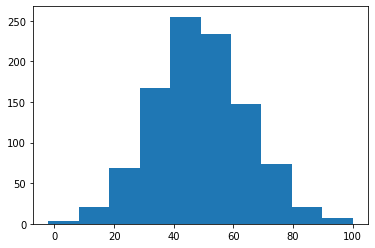

Entropy for normal Distribution  4.145544417259157


In [ ]:
#picking data from normal distribution
normalDistribution=np.random.normal(50,16,1000)
normalDistribution=[math.floor(ele) for ele in normalDistribution]
plt.hist(normalDistribution)
plt.show()
print("Entropy for normal Distribution ",getEntropy(normalDistribution))

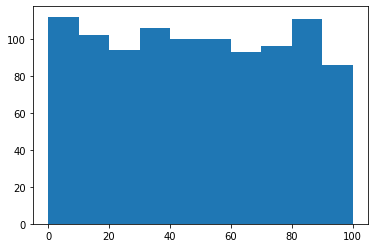

Entropy for uniform distribution  6.907755278982134


In [ ]:
#picking data from a uniform distribution
uniformDistribution=np.random.uniform(0,100,1000)
plt.hist(uniformDistribution)
plt.show()
print("Entropy for uniform distribution ",getEntropy(list(uniformDistribution)))

#Proposed Solution 

In [6]:
from math import log2
def getEntropy(distribution):
    n=len(distribution)
    freqList={ele:distribution.count(ele) for ele in list(set(distribution))}.values()
    entropy=-sum((freq/n)*log2(freq/n) for freq in freqList)
    return entropy
def getEntropyAfterAddition(currentDistribution,newEntry):
    currentDistribution.append(newEntry)
    return getEntropy(currentDistribution)

def maximizeEntropy(currentDistribution,cluster):
    entropy=dict()
    cluster=list(set(cluster))
    for ele in cluster:
        entropy[ele]=getEntropyAfterAddition(currentDistribution.copy(),ele)
    numberWithMaxEntropy=max(entropy,key=entropy.get)
    currentDistribution.append(numberWithMaxEntropy)
    return [currentDistribution,numberWithMaxEntropy,entropy]
    


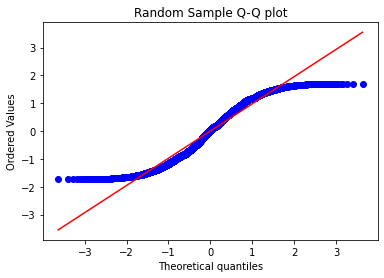

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
randomSample=[random.randrange(1,100) for _ in range(5000)]
z=(randomSample-np.mean(randomSample))/np.std(randomSample)
stats.probplot(z,dist="norm",plot=plt)
plt.title("Random Sample Q-Q plot")
plt.show()

In [ ]:
#Sample created using entropy maximization technique
entropySample=[1]
print("random Sample  length", len(randomSample))
print("entropy derived sample lenght",len(entropySample))

random Sample  length 5000
entropy derived sample lenght 1


In [ ]:

for _ in range(5000):
    # Finite sample clusters from which data will be picked for imputation.
    randomCluster=[random.randrange(1,100) for _ in range(10)]
    #Using entropy maximization for picking the best data point.
    entropySample,newEntry,entropy=maximizeEntropy(entropySample.copy(),randomCluster.copy())

In [ ]:
print("entropy of original population ",getEntropy(randomSample))
print("entropy after maximizationAlteration",getEntropy(entropySample))

entropy of original population  6.613962059874371
entropy after maximizationAlteration 6.629285998700327


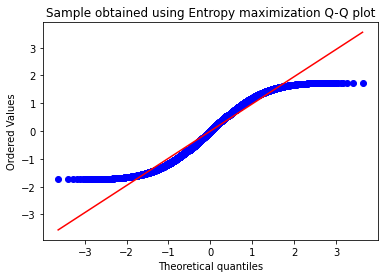

In [ ]:
z=(entropySample-np.mean(entropySample))/np.std(entropySample)
stats.probplot(z,dist="norm",plot=plt)
plt.title("Sample obtained using Entropy maximization Q-Q plot")
plt.show()

Text(0.5, 1.0, 'Histogram of random Sample')

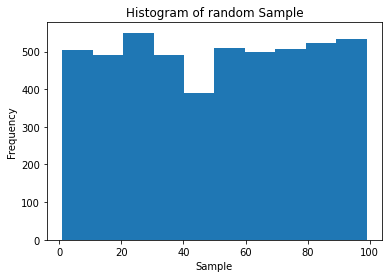

In [ ]:
plt.hist(randomSample)
plt.xlabel("Sample")
plt.ylabel("Frequency")
plt.title("Histogram of random Sample")

Text(0.5, 1.0, 'Histogram of Sample obrained using entropy maximization')

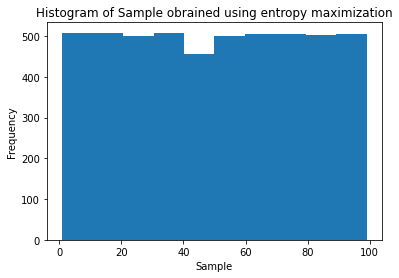

In [ ]:
plt.hist(entropySample)
plt.xlabel("Sample")
plt.ylabel("Frequency")
plt.title("Histogram of Sample obrained using entropy maximization")

In [ ]:
import statistics

print("entropy of population obtained from random imputation =",getEntropy(randomSample))
print("entropy of population obtained from entropy maximization",getEntropy(entropySample))

entropy of population obtained from random imputation = 6.613962059874371
entropy of population obtained from entropy maximization 6.629285998700327


##Entropy Maximization
Instead of picking the data at random from a sample for imputation, if we choose the data-point which maximizes the resultant entropy of the distribution post its addition, this would result in a final distribution which has minimal bias.
<br/>
It could be observerd from the above two distributions that even if we impute the data at random for a very large population size then it results in a distribution which is multimodal in nature which inturn indicates that there is no guarantee that the resultant populatioin will be bias free.
<br/>
Thus entropy maximization is the best of two words , it not only ensures that the resultant distribution is bias free , but is also uniform in nature.


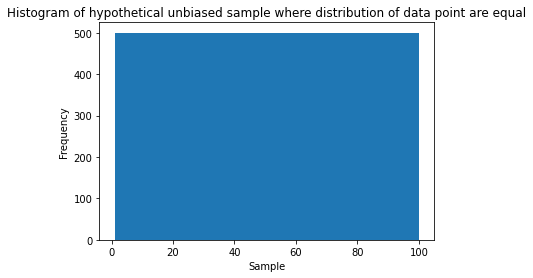

entropy of population obtained from entropy maximization 6.6438561897747395


In [7]:
# Hypothetical ideal sample where there are equal number of [1,100]
#Total sample size is 5000, unique data points are 1-100
unbiasedSample=list()
for i in range(1,101):
    unbiasedSample.extend([i]*(5000//100))

plt.hist(unbiasedSample)
plt.xlabel("Sample")
plt.ylabel("Frequency")
plt.title("Histogram of hypothetical unbiased sample where distribution of data point are equal")
plt.show()
print("entropy of population obtained from entropy maximization",getEntropy(unbiasedSample))

## As it can be observed from the above distribution that the entropy of the distribution obtained from entropy-maximization technique is as close as the hypothetical unbiased data.